# Ejemplos y ejercicios de estadística
Por Rodrigo Maciel Rubio

## Skewness

In [6]:
import numpy as np
from scipy.stats import skewnorm

# Establecer una semilla para la reproducibilidad
np.random.seed(0)

# Generar datos para una distribución normal (sin sesgo)
data_normal = np.random.normal(0, 1, 1000)

# Generar datos para una distribución con sesgo positivo
# El parámetro 'a' determina el grado de sesgo
data_pos_skew = skewnorm.rvs(a=10, size=1000)

# Generar datos para una distribución con sesgo negativo
# Un valor negativo de 'a' produce sesgo negativo
data_neg_skew = skewnorm.rvs(a=-10, size=1000)


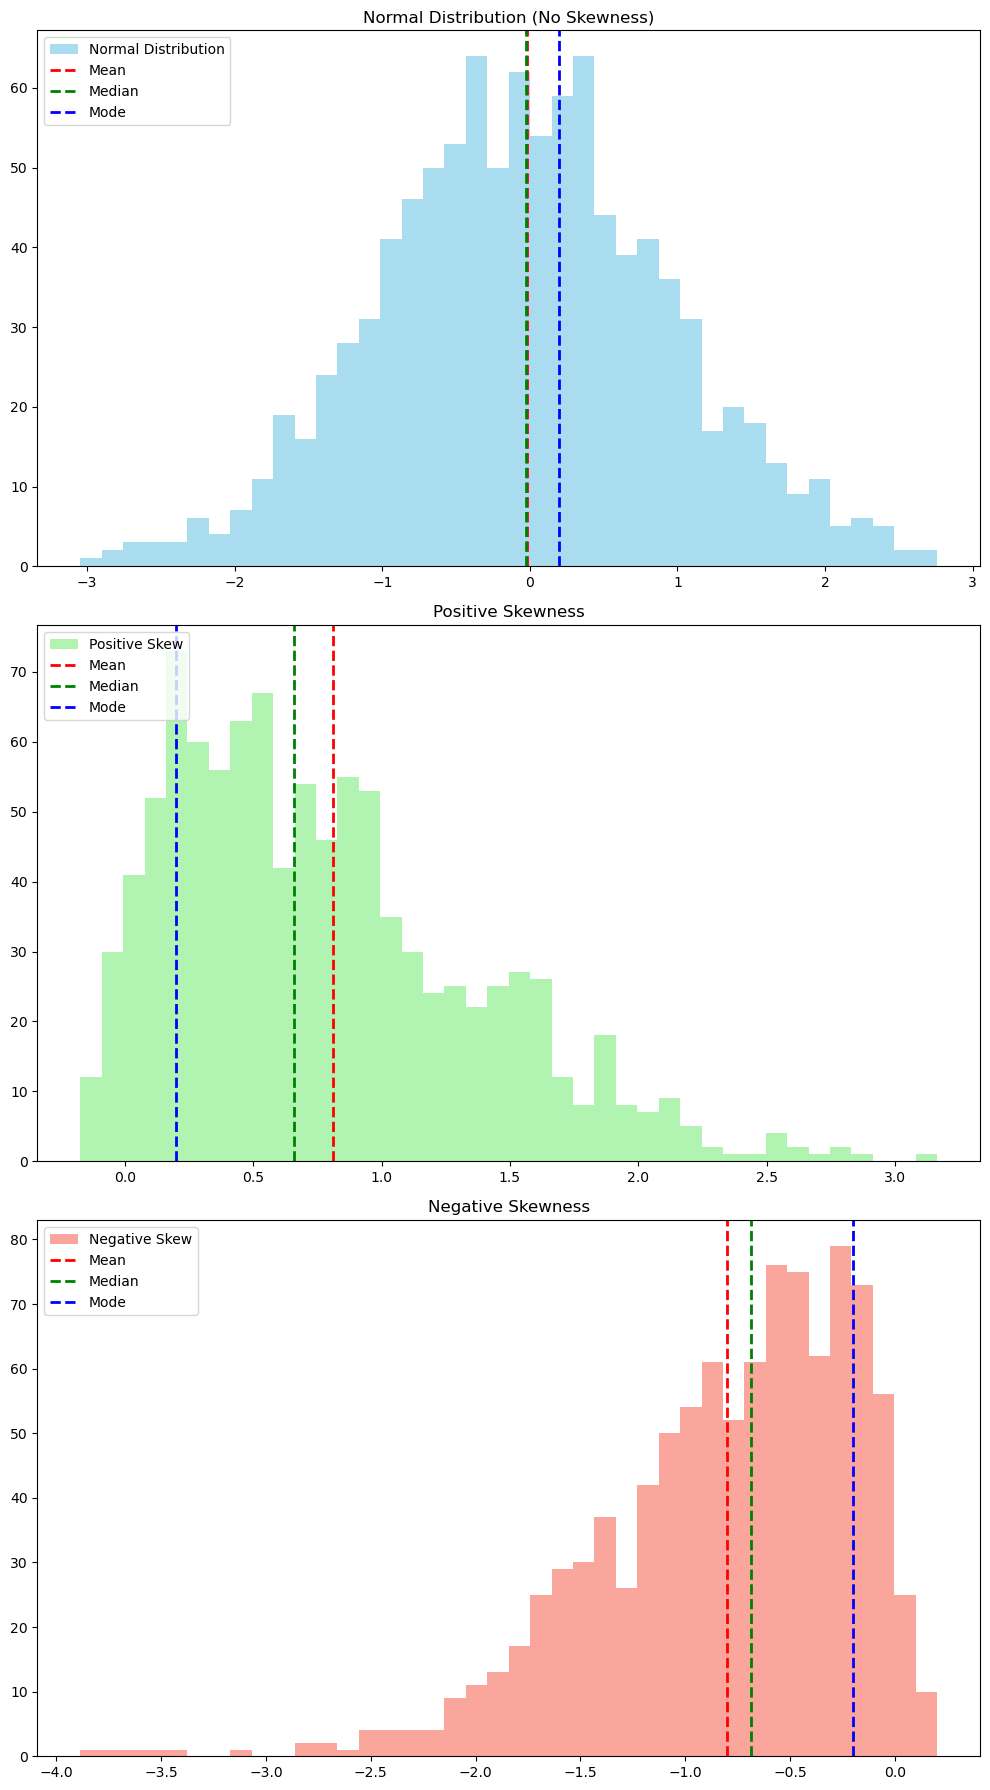

In [7]:
# Vamos a mejorar los gráficos, agregando color y leyendas para facilitar la interpretación.

# Crear los gráficos con color y leyendas
fig, axs = plt.subplots(3, figsize=(10, 18), tight_layout=True)

# Distribución normal (sin sesgo)
axs[0].hist(data_normal, bins=40, color='skyblue', alpha=0.7, label='Normal Distribution')
axs[0].axvline(stats_normal['mean'], color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[0].axvline(stats_normal['median'], color='green', linestyle='dashed', linewidth=2, label='Median')
axs[0].axvline(stats_normal['mode'], color='blue', linestyle='dashed', linewidth=2, label='Mode')
axs[0].legend(loc='upper left')
axs[0].set_title('Normal Distribution (No Skewness)')

# Distribución con sesgo positivo
axs[1].hist(data_pos_skew, bins=40, color='lightgreen', alpha=0.7, label='Positive Skew')
axs[1].axvline(stats_pos_skew['mean'], color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[1].axvline(stats_pos_skew['median'], color='green', linestyle='dashed', linewidth=2, label='Median')
axs[1].axvline(stats_pos_skew['mode'], color='blue', linestyle='dashed', linewidth=2, label='Mode')
axs[1].legend(loc='upper left')
axs[1].set_title('Positive Skewness')

# Distribución con sesgo negativo
axs[2].hist(data_neg_skew, bins=40, color='salmon', alpha=0.7, label='Negative Skew')
axs[2].axvline(stats_neg_skew['mean'], color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[2].axvline(stats_neg_skew['median'], color='green', linestyle='dashed', linewidth=2, label='Median')
axs[2].axvline(stats_neg_skew['mode'], color='blue', linestyle='dashed', linewidth=2, label='Mode')
axs[2].legend(loc='upper left')
axs[2].set_title('Negative Skewness')

plt.show()


## Intervalo de Predicción

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generamos datos simulados
np.random.seed(0)
x = np.random.rand(100) * 10  # 100 valores aleatorios de x entre 0 y 10
y_real = 2.5 + 0.5 * x  # Esta es la relación real sin error
residual_error = np.random.randn(100) * 2  # Error normalmente distribuido
y_observed = y_real + residual_error  # Observaciones con error

# Ajustamos una línea de regresión lineal simple
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y_observed)

# Calculamos los residuos
y_predicted = intercept + slope * x
residuals = y_observed - y_predicted

# Calculamos la desviación estándar de los residuos
residual_standard_deviation = np.sqrt(np.sum(residuals**2) / (len(x) - 2))



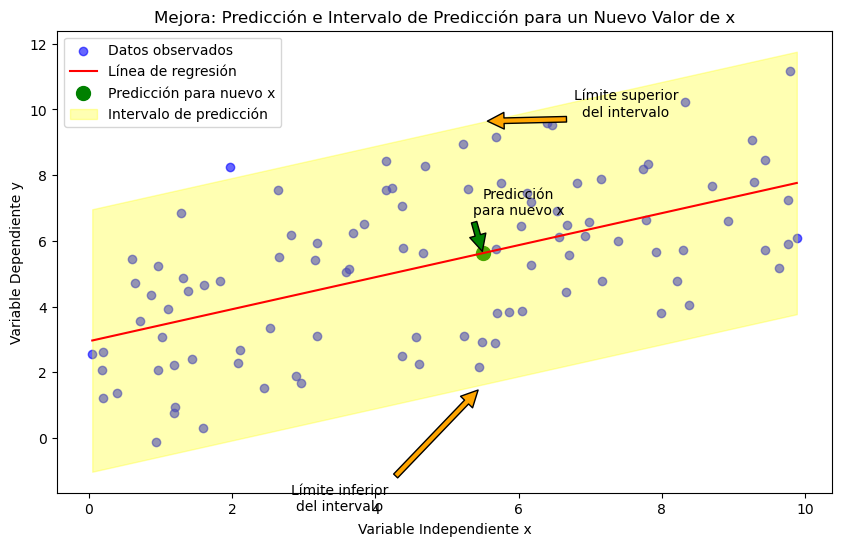

In [12]:

# Definimos un nuevo valor de x para hacer una predicción
x_new = 5.5  # Este es el valor de x para el que queremos hacer la predicción

# Calculamos el valor predicho para el nuevo valor de x
y_pred_new = intercept + slope * x_new

# Para el intervalo de predicción, necesitamos encontrar el valor crítico de la distribución t
# Establecemos un nivel de confianza del 95%
alpha = 0.05
df = len(x) - 2  # grados de libertad
t_crit = np.abs(stats.t.ppf(alpha/2, df))

# Calculamos el intervalo de predicción
interval = t_crit * residual_standard_deviation * np.sqrt(1 + 1/len(x) + (x_new - np.mean(x))**2 / np.sum((x - np.mean(x))**2))

# Valores del intervalo de predicción
y_pred_lower = y_pred_new - interval
y_pred_upper = y_pred_new + interval
# Extender la banda de intervalo de predicción por todo el rango de x visible en el gráfico
x_range = np.linspace(x.min(), x.max(), 100)
y_pred_range = intercept + slope * x_range
pred_int_lower_range = y_pred_range - t_crit * residual_standard_deviation
pred_int_upper_range = y_pred_range + t_crit * residual_standard_deviation

# Visualizamos de nuevo los datos, la línea de regresión y el punto de predicción
plt.figure(figsize=(10, 6))
plt.scatter(x, y_observed, color='blue', label='Datos observados', alpha=0.6)
plt.plot(x_range, y_pred_range, color='red', label='Línea de regresión')
plt.scatter(x_new, y_pred_new, color='green', marker='o', s=100, label='Predicción para nuevo x')

# Mejoramos la visibilidad de la banda de intervalo de predicción
plt.fill_between(x_range, 
                 pred_int_lower_range, 
                 pred_int_upper_range, 
                 color='yellow', alpha=0.3, label='Intervalo de predicción')

# Añadimos anotaciones para una mayor claridad
plt.annotate('Predicción\npara nuevo x', 
             xy=(x_new, y_pred_new), 
             xytext=(x_new+0.5, y_pred_new+2),
             arrowprops=dict(facecolor='green', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.annotate('Límite inferior\ndel intervalo', 
             xy=(x_new, y_pred_lower), 
             xytext=(x_new-2, y_pred_lower-3),
             arrowprops=dict(facecolor='orange', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.annotate('Límite superior\ndel intervalo', 
             xy=(x_new, y_pred_upper), 
             xytext=(x_new+2, y_pred_upper+1),
             arrowprops=dict(facecolor='orange', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

# Añadimos títulos y leyenda
plt.title('Mejora: Predicción e Intervalo de Predicción para un Nuevo Valor de x')
plt.xlabel('Variable Independiente x')
plt.ylabel('Variable Dependiente y')
plt.legend()

# Mostramos la gráfica mejorada
plt.show()
